In [28]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#read in reviews csv
reviews_csv = "reviews.csv"
reviews_df = pd.read_csv(reviews_csv)
reviews_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [30]:
#read in reviews csv
items_csv = "items.csv"
items_df = pd.read_csv(items_csv)
items_df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [31]:
#merged the 2 together on asin w/ left join
merged_df = pd.merge(items_df, reviews_df, how = "left", on = "asin")
merged_df.head(2)

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,prices,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0


In [32]:
#dropped unneeded columns
cell_reviews_df = merged_df.drop(columns=["reviewUrl", "prices", "url", "image"], axis = 1)
cell_reviews_df.head(3)

,asin,brand,title_x,rating_x,totalReviews,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0


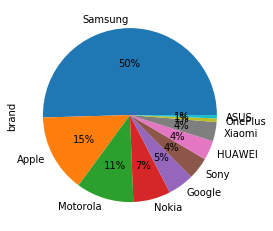

In [33]:
#created pie graph for brand counts to show break down of reviews by percentage
cell_reviews_df.brand.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [34]:
#creating dataframe showing mean reviews by brand
cell_ratings_df = cell_reviews_df.groupby(["brand"]).mean()["rating_y"]
cell_ratings_df.head().reset_index()

,brand,rating_y
0,ASUS,3.712302
1,Apple,3.641032
2,Google,3.636634
3,HUAWEI,4.312646
4,Motorola,3.774259


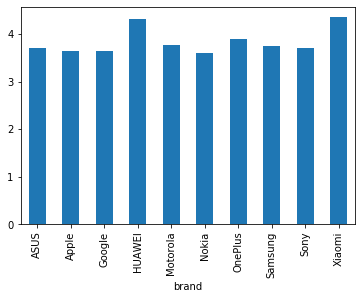

In [47]:
#created bar graph from cell_ratings_df
cell_ratings_df.plot.bar(x='brand', y='rating_y')